#Source Data

#Kaggle

#Link : https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path =  os.getcwd() + '\\' + 'Data' + '\\' + 'Advertising' + '\\'
df_data = pd.read_csv(path + 'advertising.csv')
df_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [74]:
import statsmodels.api as sm

#split the columns into y & x
y = df_data['Sales']
X = df_data[['TV','Radio','Newspaper']]

#Define the model
X = sm.add_constant(X)
model = sm.OLS(y,X)

#fit the model
result = model.fit()

#print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           8.13e-99
Time:                        23:52:50   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
#residuals is the difference between the actual value and the predict value. 

import statsmodels.api as sm
residuals = result.resid
residuals

0      0.879028
1     -0.868248
2      1.503791
3     -0.812447
4      2.255863
         ...   
195    0.494510
196    3.719059
197   -0.459287
198    0.917780
199    0.214880
Length: 200, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

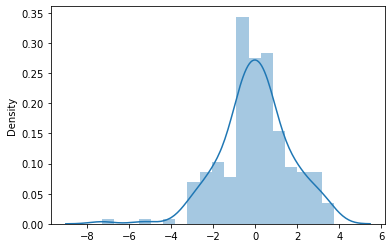

In [20]:
import seaborn as sns
sns.distplot(residuals, kde=True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'TV': 1.0046107849396502,
 'Radio': 1.1449519171055353,
 'Newspaper': 1.1451873787239286}

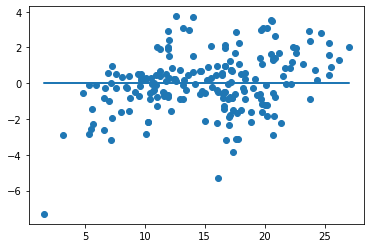

In [22]:
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

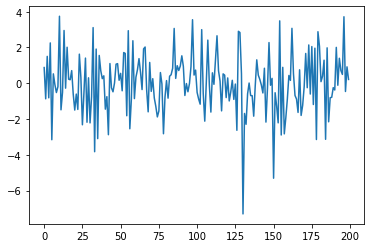

In [23]:
plt.plot(residuals.index, residuals)

In [60]:
X.drop(columns = 'const', inplace = True)

In [63]:
#Multiple Linear Regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))

0.9071151423684273


In [71]:
#Model Evaluation

import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1947417134056735
MSE: 2.370659971225657
RMSE: 1.5396947656031235


In [65]:
#predict
datatesting = np.array([[230,39,70],[37,22,11],[69,11,20]])

In [66]:
df_new = pd.DataFrame(datatesting, columns = ['TV', 'Radio', 'Newspaper'])

In [51]:
df_new

,TV,Radio,Newspaper
0,230,39,70
1,37,22,11
2,69,11,20


In [67]:
pred_hasil = model.predict(df_new)

In [68]:
pred_hasil

array([21.20933447,  8.93596711,  9.55555823])